# Stock Market Prediction using Numerical and Textual Analysis

To create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines <br><br><br>
Submitted By:<br>
<b>Mohamed Jafir Ashraf</b>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns

%matplotlib inline

In [3]:
appl = pd.read_csv('appleshare.csv')


In [4]:
appl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/8/2008,42.790001,44.169998,41.450001,44.099998,42.299274,3248400
1,8/11/2008,44.540001,44.570000,43.160000,43.720001,41.934803,2258300
2,8/12/2008,43.500000,44.070000,43.049999,43.759998,41.973156,1641400
3,8/13/2008,43.419998,43.650002,42.209999,43.450001,41.675819,1785400
4,8/14/2008,43.330002,45.000000,43.009998,44.240002,42.433556,1166600


In [5]:
appl.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1984,6/27/2016,153.740005,155.699997,152.199997,153.779999,151.642273,2242500
1985,6/28/2016,154.869995,157.160004,154.279999,156.979996,154.797791,1533700
1986,6/29/2016,158.029999,161.779999,158.029999,161.009995,158.771759,1560000
1987,6/30/2016,161.020004,161.699997,159.500000,161.630005,159.383118,791600
1988,7/1/2016,162.160004,164.699997,161.779999,164.330002,162.045578,876500


In [6]:
appl_1 = pd.read_csv('appleshare.csv', index_col='Date', parse_dates=True)
appl_1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-08-08,42.790001,44.169998,41.450001,44.099998,42.299274,3248400
2008-08-11,44.540001,44.570000,43.160000,43.720001,41.934803,2258300
2008-08-12,43.500000,44.070000,43.049999,43.759998,41.973156,1641400
2008-08-13,43.419998,43.650002,42.209999,43.450001,41.675819,1785400
2008-08-14,43.330002,45.000000,43.009998,44.240002,42.433556,1166600
...,...,...,...,...,...,...
2016-06-27,153.740005,155.699997,152.199997,153.779999,151.642273,2242500
2016-06-28,154.869995,157.160004,154.279999,156.979996,154.797791,1533700
2016-06-29,158.029999,161.779999,158.029999,161.009995,158.771759,1560000


In [7]:
mean = appl_1['Adj Close'].rolling(100).mean()
mean

Date
2008-08-08           NaN
2008-08-11           NaN
2008-08-12           NaN
2008-08-13           NaN
2008-08-14           NaN
                 ...    
2016-06-27    151.048211
2016-06-28    151.139366
2016-06-29    151.308788
2016-06-30    151.508858
2016-07-01    151.735061
Name: Adj Close, Length: 1989, dtype: float64

### Visualize forecasting of the Apple stock price

In [8]:
appl_stock = appl_1['Adj Close']

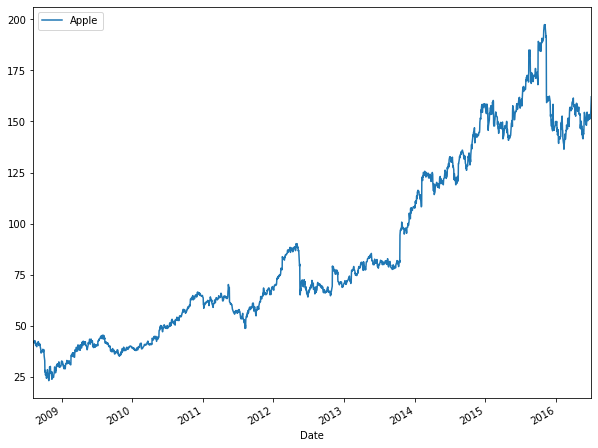

In [9]:
plt.figure(figsize = (10 , 8))
appl_stock.plot(label='Apple')
plt.legend()

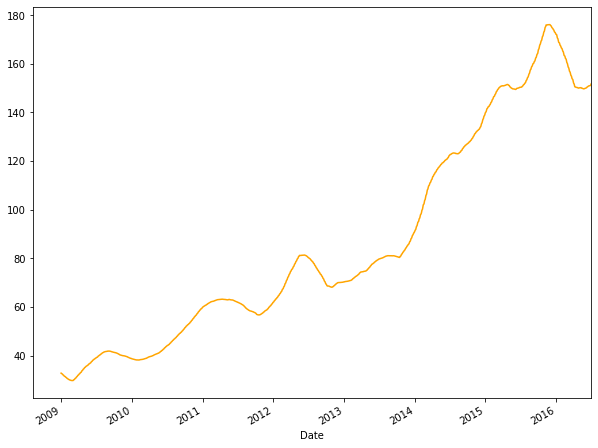

In [10]:
plt.figure(figsize = (10 , 8))
mean.plot(label='Average', color='orange')

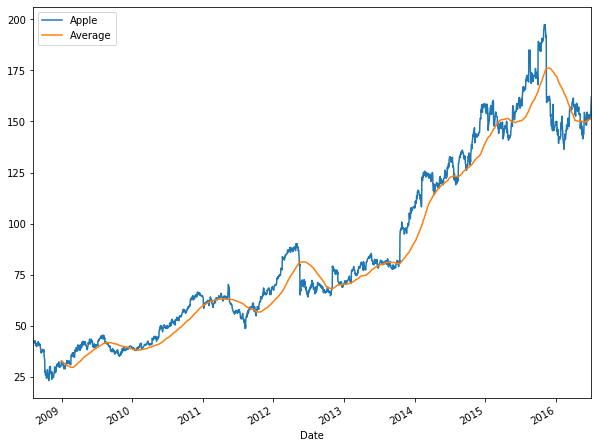

In [11]:
plt.figure(figsize = (10 , 8))
appl_stock.plot(label='Apple')
mean.plot(label='Average')
plt.legend()

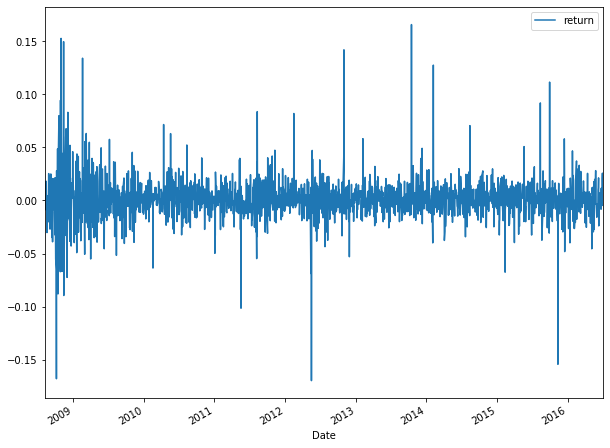

In [12]:
plt.figure(figsize = (10 , 8))
ret = appl_1['Adj Close']/appl_1['Adj Close'].shift(1)-1
ret.plot(label='return')
plt.legend()

## Analysis India-News-Headlines Numerical Analysis

In [13]:
df1 = pd.read_csv("india-news-headlines.csv")

In [14]:
df1.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [15]:
df1['headline_category'].unique()

array(['sports.wwe', 'unknown', 'entertainment.hindi.bollywood', ...,
       'elections.assembly-elections.delhi-assembly-elections',
       'elections.assembly-elections.delhi', 'life-style.coronavirus'],
      dtype=object)

In [16]:
df1['headline_text'].value_counts()

Sunny Leone HOT photos                                             98
Watch top news in one-minute                                       90
Official Site                                                      89
Football: Italian Serie A table                                    88
Football: Spanish La Liga table                                    86
                                                                   ..
Father had a premonition about his death: Capt Mulla's daughter     1
Women cheer; throng reserved Metro doors                            1
26 kids from state chosen for Science Congress                      1
There is something amiss in migrants' life                          1
Why every woman has an 'indecent exposure' story                    1
Name: headline_text, Length: 3082589, dtype: int64

In [17]:
df1['headline_category'].value_counts()

india                      285619
unknown                    207732
city.mumbai                132649
city.delhi                 124658
business.india-business    115246
                            ...  
sports.headline3                7
ballot-talk                     7
did-you-know                    6
sports.headline6                3
party-manifestos                2
Name: headline_category, Length: 1016, dtype: int64

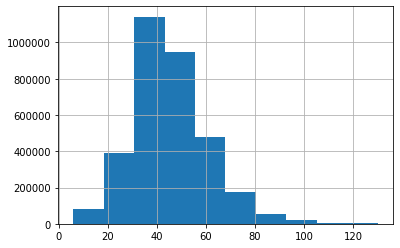

In [29]:
df1['headline_text'].str.len().hist()
plt.show()

In [38]:
df_news = df1['headline_text'].value_counts().head(10)
df_cate = df1['headline_category'].value_counts().head(10)

Text(0.5, 1.0, 'Top 10 Headline News')

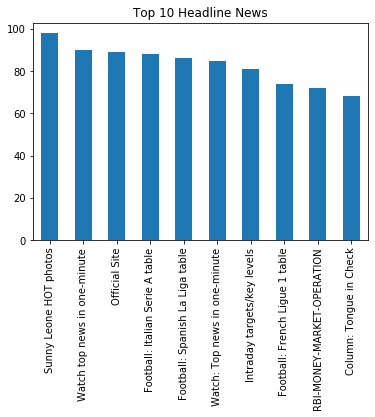

In [39]:
df_news.plot(kind='bar')
plt.title('Top 10 Headline News')

Text(0.5, 1.0, 'Top 10 Category of Headline News')

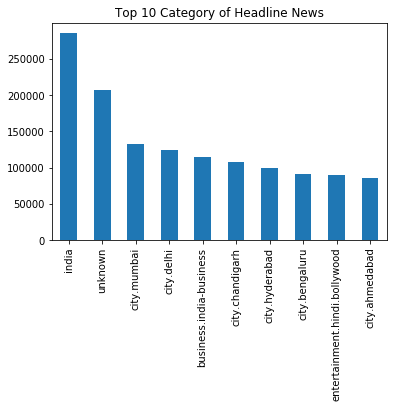

In [37]:
df_cate.plot(kind='bar')
plt.title('Top 10 Category of Headline News')